# Trend Analysis using Open Interest, Rollover and FII/DII Activity in Python

The first quarter of 2020 has been one of the most challenging times in the post World War II era. The crash in oil prices due to geopolitical reasons and the COVID-19 global pandemic were the dominant themes. Financial markets act as bellwethers and give us a reflection of the overall sentiment for the world economy. These sentiments are reflected not only in the price but also in other metrics such as open interest, rollover percent, FII/DII activity.

This blog aims to analyse the aforementioned three important metrics for Nifty 50, the leading broad-based market index in India. We will use Python to conduct this analysis.

**Contents:**
1. Importing Python libraries
2. Nifty 50 futures
3. Getting the data
4. Analysing the price movement
5. Analysing price vs volume
6. Open interest analysis
7. Rollover analysis
8. FII/DII activity analysis
9. Summary

## Importing Python libraries

Before we begin any analysis in Python, we need to import the required libraries. We will use popular libraries like pandas, NumPy and Matplotlib (for visualisation). 

Let us import them now.

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')


In [ ]:

import warnings
warnings.simplefilter('ignore')

In [ ]:
#https://blog.quantinsti.com/trend-analysis-open-interest-rollover-fii-dii-python/ #plt.style.available

## Nifty 50 futures

The Nifty 50 is a broad-based and diversified index of fifty stocks representing thirteen sectors of the Indian economy. It is the underlying for Nifty 50 future contracts, which trade on the National Stock Exchange (NSE).<br>

At any point in time, there are only three Nifty futures contracts that are available for trading - the near month (I), the next month (II) and the far month (III). Each contract has a life of three months and expires on the last Thursday of the expiry month, upon which a new contract is introduced for a three month duration. In case the third Thursday of a month is a holiday, the contract expires on the previous trading day.

## Getting the data

The next part is getting the Nifty futures data. Both current and historical data for Nifty futures can obtained from what is called the equity derivatives 'Bhavcopy' for free. Equity derivatives Bhavcopy is a file provided by the exchange (NSE in this case) which contains all the information about various stock and equity index derivatives that are traded on the exchange. Such data can be obtained from the  [NSE website](https://www1.nseindia.com/products/content/derivatives/equities/archieve_fo.htm).  Alternatively, brokers or data vendors can supply such data to their clients.

A Bhavcopy file is released daily by the exchange and it can be downloaded as a csv file. Here we have downloaded all such files for the first quarter of 2020, i.e. from 1-Jan-2020 to 31-Mar-2020 to conduct this analysis. Then, we use the following code to get it into a pandas DataFrame format:

In [7]:
# Fetching NIFTY futures data from bhavcopy files and storing it into a DataFrame

dates = [str(x) if x>=10 else '0'+str(x) for x in range(1, 32)]
months = [str(x) if x>=10 else '0'+str(x) for x in range(1, 13)]
years = [2020]

data = pd.DataFrame(columns=['<ticker>', '<date>',  '<open>', '<high>', '<low>', '<close>', '<volume>', '<o/i>'])
df = pd.DataFrame()

for year in years:
    for month in months:
        for date in dates:
            filename = f'{year}-{month}-{date}-NSE-FO.txt'
            try:
                df = pd.read_csv(filename)
                data = data.append(df.iloc[3:6], ignore_index=True)
            except:
                pass

# Keeping only the required columns and renaming them
data=data[['<ticker>', '<date>', '<close>', '<volume>', '<o/i>']]
data.columns=['ticker', 'date', 'close', 'volume', 'oi']

#converting date column elements into datetime object from integers and making the Date as the index
Date=[]
a= data['date']

for i in range(len(a)):
    c=str(a[i])
    b= datetime(year=int(c[0:4]), month=int(c[4:6]), day=int(c[6:8]))
    Date.append(b)
    
data['Date']=Date    
data.set_index('Date',drop=True,inplace=True)
data.drop(['date'],axis=1,inplace=True)

data.head()

,ticker,close,volume,oi
Date,,,,


The above DataFrame 'data' has four columns containing ticker names (Nifty I, II or III), close prices, traded volume and open interest on a daily basis. Thus, we have all the required information to conduct this analysis for the first quarter of 2020.

In the next section, we can move onto visualising and analysing this information.

## Analysing the price movement

After getting the data ready for analysis, let's plot the price series of the futures in a plot. As the expiry dates affect the behaviour of futures, we have marked them in vertical red lines.

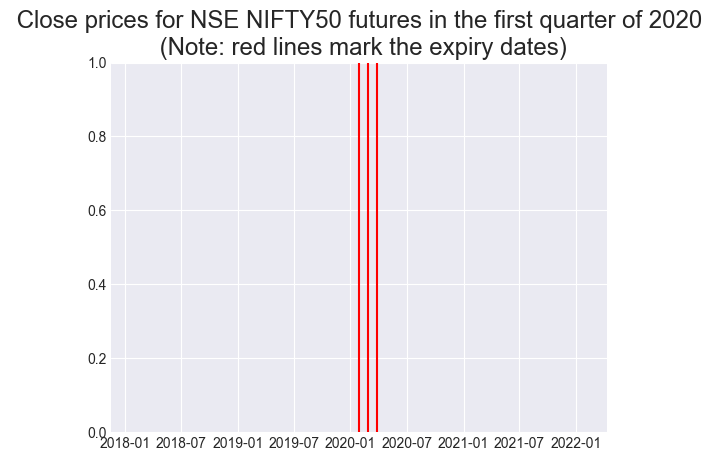

In [8]:
#plotting close prices for NIFTY futures
data['close'].groupby(data['ticker']).plot(figsize=(15,7))
plt.title(' Close prices for NSE NIFTY50 futures in the first quarter of 2020 \n (Note: red lines mark the expiry dates)'\
         ,fontsize ='xx-large') 
plt.axvline(datetime(2020, 1, 30), color='r') # Jan expiry
plt.axvline(datetime(2020, 2, 27),color='r') # Feb expiry 
plt.axvline(datetime(2020, 3, 26),color='r') # March expiry 
plt.legend()
plt.show()

We can observe that the Nifty 50 futures remained close to 12000 level in January and February and crashed almost 40 percent in the month of March(especially after the March expiry) in the wake of intensifying COVID-19 pandemic. After hitting a low of 7581 on the 23rd of March (just three days before the March expiry) for the near month future, the price started consolidating towards the end of March and into April.

## Analysing price vs volume

The next step is to analyse price with the volume. An increase in the traded volume signifies increased interest of the particpants in the market, however, it does not tell anything about the direction of future trend on its own. Hence we analyse it in combination with current price trend as an indicator of the future price trend.

In general, if an increase in price is accompanied by higher than average volume, it indicates that the momentum is still high and prices can continue to go up. Similarly, if the fall in price is accompanied by higher than average volumes, it indicates downward momentum.

However, if an increase or decrease in price is accompanied by lower than average volume, it indicates that the upward/downward momentum is losing steam and a reversal is just around the corner.

Let us inspect the price volume dynamic for Nifty 50 futures in the first quarter of 2020.

In [9]:
# price vs volume analysis

ax =data['volume'].groupby(data.index).sum().plot(figsize=(15,7), color='black')

plt.ylabel('Volume traded in number of contracts',fontsize='x-large') 
plt.title(' Price vs volume \n (Note: red lines mark the expiry dates)',fontsize ='xx-large')

plt.axvline(datetime(2020, 1, 30), color='r') #expiry1
plt.axvline(datetime(2020, 2, 27),color='r')
plt.axvline(datetime(2020, 3, 26),color='r')

plt.axvline(datetime(2020, 3, 13),color='black', ls=':', ymax=0.95)


data[data['ticker']=='NIFTY-I']['close'].plot(ax=ax, secondary_y=True,color='b')
plt.ylabel('Close prices Nifty',fontsize='x-large')
plt.legend()
plt.show()

TypeError: no numeric data to plot

In the month of March, we can observe the big increments in the average volume traded coupled with a crash in prices, indicating strong momentum being built to the downside. The volume traded spiked to a high of more than 700000 contracts on the 13th of March (as indicated by the dotted line), giving traders a confirmation to go short. After the March expiry, the volume traded seems to be coming back towards its average levels, indicating the beginning of a short term consolidation phase after a big move.

However,  one can see that neither the price nor the volume showed any indications of what was to come until the beginning of March. It did not tell us anything about how the big players were positioning themselves in the market in the wake of COVID-19 and other factors. That is where open interest analysis comes into the picture, which we will discuss in the next section.

## Open interest analysis

Open interest for a derivative such as futures is the total number of outstanding contracts, that is those futures contracts that have not been settled. Open interest does not take into account every buy and sell, unlike the volume. High open interest reflects high investor interest and is thus used as an indicator for predicting the price trend. Analysis of open interest is quite popular among derivatives traders as a filter before taking on any new position.

In the figure below, we plot the combined open interest for all the three series of Nifty futures for the first quarter of 2020.

In [ ]:
#plotting open interest across all three series
data['oi'].groupby(data.index).sum().plot(figsize=(15,7),color='g')
plt.title(' Open interest in NSE NIFTY50 futures in the first quarter of 2020 \n (Note: red lines mark the expiry dates)'\
         ,fontsize ='xx-large')
plt.ylabel('Open interest in crores of contracts',fontsize='x-large') 
plt.axvline(datetime(2020, 1, 30), color='r') #expiry1
plt.axvline(datetime(2020, 2, 27),color='r')
plt.axvline(datetime(2020, 3, 26),color='r')
plt.legend()
plt.show()

In the figure above we can clearly see that the combined open interest started increasing towards the end of February and remained at very high levels in the first three weeks of March. It then shot down massively after the March expiry and reached a low point towards the end of March and then into April.

Just like volume, open interest is studied in conjunction with the price to get a clearer idea about the future trend. There are the following four cases when it comes to analysing price and open interest:

* **Bullish**: If the price is increasing and the open interest is increasing, then it indicates a bullish trend i.e.
  longs are building up
* **Bearish**: If the price is decreasing and the open interest is increasing, then it indicates a bearish trend i.e. shorts
  are building up
* **Shorts unwinding or Short covering**: If the price is increasing and the open interest is decreasing, then it indicates that   the investors are closing out their short positions 
* **Longs unwinding**: If the price is decreasing and the open interest is decreasing, then it indicates that the longs exiting their positions   

In the figure below, we plot the open interest overlayed with the price for the next part of the analysis.

In [ ]:
#plotting close prices and open interest together
ax= data['oi'].groupby(data.index).sum().plot(figsize=(15,7), color='g')
plt.ylabel('Open interest to volume ratio',fontsize='x-large') 
plt.title(' Close price vs Open interest \n (Note: red lines mark the expiry dates)',fontsize ='xx-large')
plt.legend()
plt.axvline(datetime(2020, 1, 30), color='r') 
plt.axvline(datetime(2020, 2, 27),color='r')
plt.axvline(datetime(2020, 3, 26),color='r')

data[data['ticker']=='NIFTY-I']['close'].plot(ax=ax, secondary_y=True,color='b')
plt.ylabel('Close prices Nifty',fontsize='x-large')

plt.show()

Studying price and open interest together gives us a much clearer view. We can see above that as we approached the February expiry, the price did not give us much clue about things to come but at the same time, the open interest started to shoot up, indicating a build-up of new short positions. It was the period when COVID-19 started to emerge as a serious threat to the world economy. In the second week of March, as the price crashed, the open interest shot up and remained at elevated levels indicating that bearishness has taken over the market. In the first week of April, the price recovered from its low with low levels of open interest indicating investors are closing out their short positions also called short covering.

Thus, we see that towards the end of February(near the expiry), open interest analysis would have told us much more compared to just price and volume. But at that point, it does not tell us whether the players who have taken a short position still have the conviction to carry forward their positions into March. This is where the rollover analysis becomes important, which we conduct in the next section.

## Rollover analysis

Rollover, as the name suggests is the rolling over or carrying forward of position in futures of the current month expiry, to the next month series. For example, as the January expiry comes close, a trader who holds a long position in January futures has two options. She can either let the position expire and take the delivery or in a simultaneous trade sell the January future and buy the February future. The latter is called rolling over the position. 

For any trading month, the total rollover is usually expressed as a percent which is calculated using the open interest data for all the future series. The rollover percent for the Nifty 50 futures is calculated as:


Rollover percentage for any trading month = $\frac{(Next\;month\;OI)\; + \;(Far\;month\;OI)} {(Near\;month\;OI) \;+ \;(Next\;month\;OI) \;+ \;(Far\;month\;OI)}$, (where OI is the open interest)

Rollover percent, when compared with its previous three month or six month average reveals the increased or decreased conviction of traders in the position that they hold. When studied alongside the movement in price, rollover percent reflects the strength of the current trend. In general, the following rules hold:

* **Continuation of an upward trend**: If the price is increasing with high rollover percent, it indicates that the bullish trend is strong and is likely to  continue
* **Continuation of a downward trend**: If the price is decreasing with high rollover percent, then it indicates that the bearish trend is strong and is likely to continue
* **Weakening of an upward trend**: If the price is increasing with low rollover percent, then it indicates the upward trend is weakening, and we might see a downward reversal
* **Weakening of a downward trend**: If the price is decreasing with low rollover percent, then it indicates the downward trend is weakening, and the bottoming out process is over which might lead to a consolidation phase and eventual upward reversal



Below, we write a function to fetch data and calculate the rollover percent for all the three expiry months in the first quarter of 2020. We store this information in a new DataFrame called 'expiry_df' as follows:

In [ ]:
# Creating a function to generate rollover percent
def rollover(DF, expiry_date):
    ''' This function takes the futures data, expiry date
        and returns an estimate of rollover percent '''
    
    df = data.loc[expiry_date]
    
    Near_month_oi = df[df['ticker']=='NIFTY-I']['oi'].mean()
    Next_month_oi = df[df['ticker']=='NIFTY-II']['oi'].mean()
    Far_month_oi = df[df['ticker']=='NIFTY-III']['oi'].mean()
    
    return round(100* (Next_month_oi + Far_month_oi) /  (Near_month_oi + Next_month_oi + Far_month_oi),2)


# Creating a new DataFrame with rollover % for expiry dates
expiry_dates =[datetime(2020, 1, 30).date(),datetime(2020, 2, 27).date(),datetime(2020, 3, 26).date()]

expiry_df = pd.DataFrame(index=expiry_dates , columns = ['rollover %','oi','Nifty'])

for i in range(len(expiry_dates)):
    expiry_df['rollover %'].iloc[i] = rollover(data, expiry_dates[i])
    expiry_df['oi'].iloc[i] = data[data['ticker']=='NIFTY-II']['oi'].loc[expiry_dates[i]]
    expiry_df['Nifty'].iloc[i] = data[data['ticker']=='NIFTY-I']['close'].loc[expiry_dates[i]]
    
expiry_df.index.name='Expiry_date'
expiry_df

We now plot the rollover percentages for the month of January, February and March of 2020:

In [ ]:
#plotting price with rollover% on the same plot
data[data['ticker']=='NIFTY-I'].close.plot(figsize=(15,7),color='b')
plt.title(' Close price vs rollover % in Q1 of 2020 \n (Note: Horizontal green line marks the three month average rollover%\n \
Vertical red lines mark the expiry dates)', fontsize='xx-large' )
plt.axvline(datetime(2020, 1, 30), color='r') 
plt.axvline(datetime(2020, 2, 27),color='r')
plt.axvline(datetime(2020, 3, 26),color='r')
plt.ylabel('Close price of Nifty-I',fontsize='x-large')
plt.legend(loc='lower left')

axes2 = plt.twinx()
axes2.bar(expiry_df.index, expiry_df['rollover %'], color='indigo', label='rollover %', width= 2)
plt.ylabel('Rollover in %',fontsize='x-large')
plt.axhline(70, color='green')
plt.legend(loc='best')
plt.show()

The vertical bars in the above plot represent rollover percentages on the expiry dates. As we reached towards the February expiry, the price had begun to fall coupled with a high rollover percent of about 77% ( when compared with the three-month average rollover percent i.e. the horizontal green line). It shows that the shorts that were built in February were rolled into March with strong conviction. However, going from March into April, the rollover percent was reduced to about 62%, much below the three month average indicating that those shorts were closed at the end of March. This points to the fact that bottoming-out occurred towards the end of March and the market would stabilize from hereon, waiting for further fresh developments.

# FII/DII activity

FIIs and DIIs (foreign and domestic institutional investors) are big players such as mutual funds, insurance companies and hedge funds. Such investors play a significant role in the market and their activity can indicate the future trend. These investors employ advanced research methodologies to predict the trend before taking positions and hence are called the 'smart money'.

Between FIIs and DIIs, FIIs are more of what is also called the 'hot money', i.e. money that is invested to gain short term profits and moves back very quickly if the economic scenario changes. In the Indian context, DIIs are more stable investors like long-only mutual funds and tend to buy the securities at discounted rates when FIIs sell heavily.

For the Indian markets, you can get the FII/DII activity data for free from the [NSE](https://www1.nseindia.com/products/content/derivatives/equities/archieve_fo.htm) and [NSDL](https://www.fpi.nsdl.co.in/web/Reports/ReportsListing.aspxand) websites. Alternatively, your broker or data vendor can provide you this data as well. Below we fetch and take a peek at this data for the last month of 2019 and the first quarter of 2020:

In [ ]:
# Fetching FII/DII data
fii_dii = pd.read_excel('FII DII.xlsx')

fii_dii

The first two columns represent the month-wise **net** (Buy-Sell) investment by FIIs and DIIs respectively in Nifty 50. The last column shows the level at which Nifty was on the last day of the month.<br><br>Let us now visualise the data to see how FII/DII activity unfolded over this timeframe in Nifty using the following code: 

In [ ]:
# plotting and visualising FII/DII data
ax = fii_dii[['net FII buy/sell', 'net DII buy/sell']].plot(figsize=(15,7),color=['red','blue'],marker='d', markersize=12)
plt.ylabel('FII/DII net Investment in crores',fontsize='x-large')
plt.xlabel('Month',fontsize='x-large')
fii_dii['NIFTY'].plot(ax=ax, secondary_y='NIFTY',color='black',linestyle='dashed', marker='o',\
                      markerfacecolor='black', markersize=12)
plt.ylabel('NIFTY',fontsize='x-large')
plt.xlabel('Month',fontsize='x-large')
plt.title('FII/DII net investment vs Nifty', fontsize='xx-large')
plt.legend()
plt.show()

It can be seen in the above plot that FIIs started selling early in January itself with a net selling of 5359 crores. It was evident that FIIs were well informed about the global spread of COVID-19 and took early action. This selling by FIIs continued well into February and March (reaching a record level of about 65000 crores in March). At the same time, the DIIs stepped in to support the market but the markets were completely dominated by the selling. We see that spotting the FII selling momentum that built through January and February would have given a lot of investors an exit signal from long positions, and saved them from a catastrophic move in the month of March.

## Summary

In the course of this blog, we have seen about how we can analyse indicators such as open interest, rollover data and FII/DII activity to predict the future trend and make better trading decisions. We performed this analysis in the context of Indian futures and equity index, but its principles can be as easily applied to other asset classes such as commodities and other markets. 

These indicators can be used as filters to enhance your existing stock selection criteria or to develop new trading strategies. However, it goes without saying that these are just indicators, and other factors should be taken into account before making investment decisions. I hope you have enjoyed reading this blog and learnt something useful. Keep safe and keep trading!

<br>


_**Disclaimer**: All investments and trading in the stock market involve risk. Any decisions to place trades in the financial markets, including trading in stock or options or other financial instruments is a personal decision that should only be made after thorough research, including a personal risk and financial assessment and the engagement of professional assistance to the extent you believe necessary. The trading strategies or related information mentioned in this article is for informational purposes only._